In [1]:
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd

## Task 1, 2

### New York City Taxi Trip Duration dataset

In [2]:
df = pd.read_csv('taxi.csv')
df.dropna()
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df.pickup_datetime = df.pickup_datetime.dt.date

In [3]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2863541,2,2016-01-31,2016-01-31 13:21:37,2,-73.989609,40.741718,-73.991013,40.755867,N,557.0
1,id1752141,1,2016-05-03,2016-05-03 18:41:09,1,-73.993935,40.761517,-73.975281,40.751507,N,1210.0
2,id1331142,1,2016-06-05,2016-06-05 02:28:04,1,-73.988625,40.722538,-73.980347,40.742752,N,445.0
3,id0227018,2,2016-01-11,2016-01-11 20:14:26,1,-73.976723,40.775311,-73.964333,40.765560,N,433.0
4,id2263790,2,2016-01-22,2016-01-22 00:40:48,5,-74.005852,40.740360,-73.988708,40.758781,N,529.0
...,...,...,...,...,...,...,...,...,...,...,...
23490,id1533142,1,2016-05-19,2016-05-19 23:17:35,1,-73.991310,40.760262,-74.002831,40.756229,N,256.0
23491,id2026431,1,2016-06-14,2016-06-14 10:44:53,1,-74.005684,40.740582,-73.980438,40.751953,N,1332.0
23492,id2755386,2,2016-06-11,2016-06-11 13:23:25,1,-73.982430,40.772610,-73.863739,40.769241,N,2063.0
23493,id3474931,2,2016-06-12,2016-06-12 01:58:24,1,-73.989098,40.721386,-74.009193,40.738068,N,792.0


In [4]:
df['pickup_datetime'].value_counts()

2016-02-27    166
2016-02-20    166
2016-04-08    164
2016-01-30    162
2016-04-14    161
             ... 
2016-01-11     96
2016-06-19     85
2016-01-02     85
2016-01-24     59
2016-01-23     26
Name: pickup_datetime, Length: 182, dtype: int64

### Аггрегируем информацию из датасета по сумме времени поездки в каждый из представленных дней

In [5]:
agg_func = {'trip_duration': ['sum'], 'passenger_count': ['sum']}
data = df.groupby(['pickup_datetime']).agg(agg_func)
data = data.reset_index()
data.columns = ['date',  'duration', 'passenger_count']
data.head()

,date,duration,passenger_count
0,2016-01-01,185116.0,214
1,2016-01-02,73271.0,155
2,2016-01-03,229011.0,190
3,2016-01-04,76952.0,165
4,2016-01-05,92951.0,179


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             182 non-null    object 
 1   duration         182 non-null    float64
 2   passenger_count  182 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.4+ KB


## Task 3

### Plotly

In [7]:
fig = go.Figure(px.bar(x=data['date'], y=data['duration']))
fig.update_traces(marker=dict(line=dict(color='black', width=2), color=data['duration'], coloraxis="coloraxis"))
fig.update_layout(
    title='Продолжительность поездки', titlefont_size=20, title_yanchor='top', title_x=0.5, title_y=0.95,
    xaxis_title='Дата', xaxis_title_font_size=16, xaxis_tickfont_size=14, xaxis_tickangle=315,
    yaxis_title='Время в пути, c', yaxis_title_font_size=16, yaxis_tickfont_size=14,
    height=700,
    margin=dict(l=0, r=0),
)
fig.show()

### Matplotlib

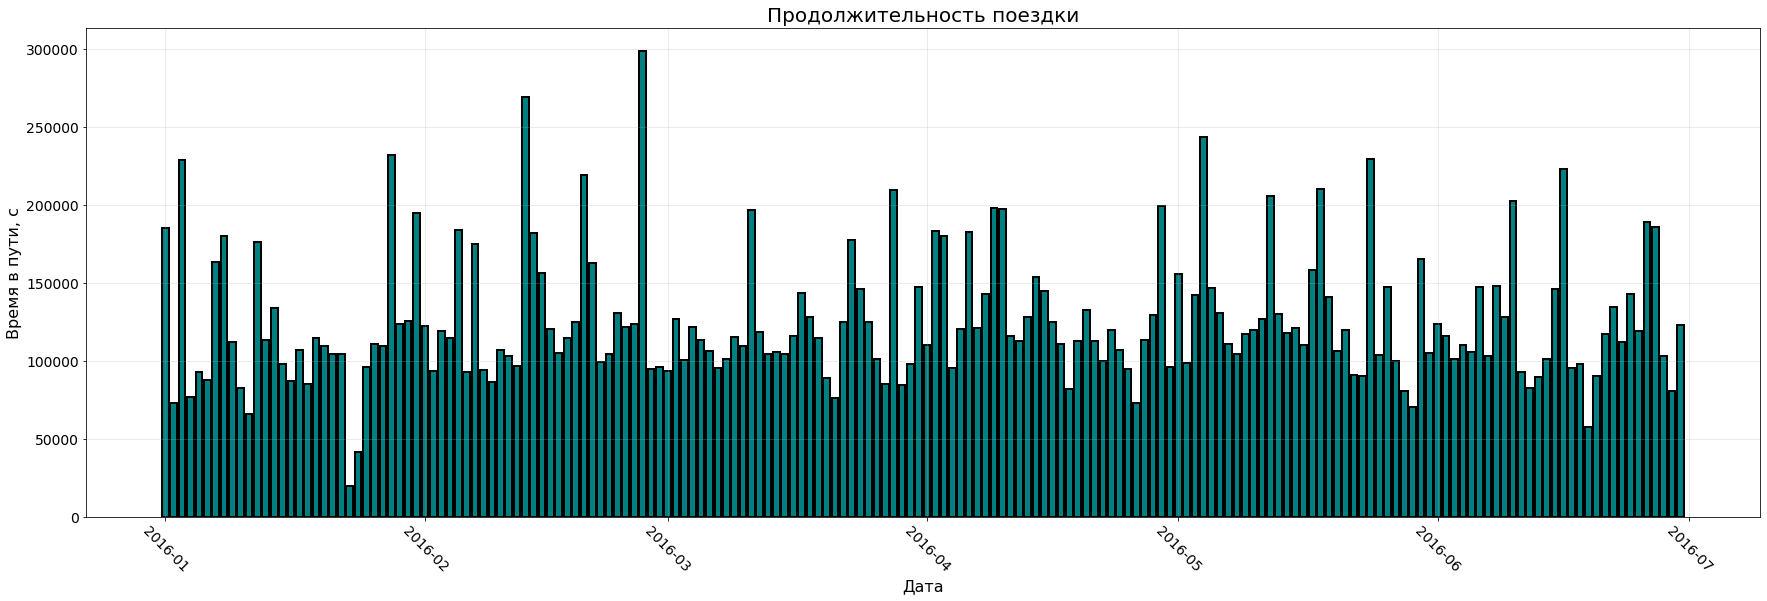

In [8]:
plt.figure(figsize=(30, 9))
plt.bar(data['date'], data['duration'], edgecolor='black', linewidth=2, color='teal')
plt.grid(alpha = 0.3, zorder=1)
plt.title('Продолжительность поездки', fontsize=20)
plt.xlabel('Дата', fontsize=16)
plt.ylabel('Время в пути, c', fontsize=16)
plt.xticks(fontsize=14, rotation=315)
plt.yticks(fontsize=14)
plt.show()

## Task 4

In [9]:
pie_data = data[:20]

### Ploty

In [10]:
fig = go.Figure(go.Pie(labels=pie_data['date'], values=pie_data['duration'],title='Время в пути, с' ,marker=dict(line=dict(color='black', width=2))))

fig.update_layout(
    title='Продолжительность поездки', titlefont_size=20,
    title_xanchor='center', title_yanchor='top',
    title_x=0.47, title_y=0.95,
    height=700,
    margin=dict(l=0, r=0),
)
fig.show()

### Matplotlib

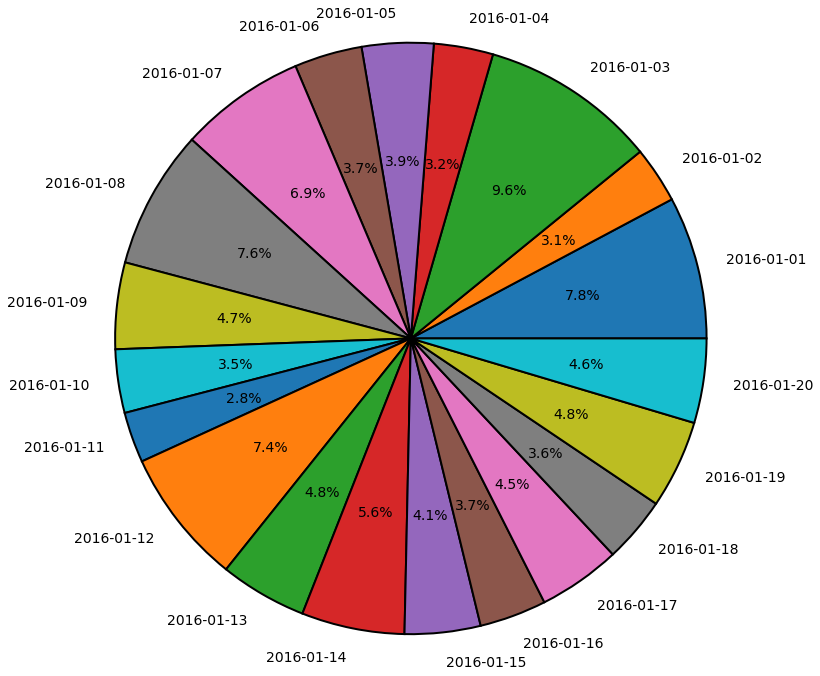

In [11]:
plt.figure(figsize=(30, 8), facecolor='white')
plt.pie(pie_data['duration'], labels=pie_data['date'], autopct='%.1f%%',
        textprops={'fontsize': 14}, radius=1.7, wedgeprops=dict(edgecolor='black', linewidth=2))
plt.show()

## Task 5

### Ploty

In [24]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['date'][0:20], y=data['duration'][0:20].cumsum(),
                         mode='lines+markers', name='lines+markers',
                        line=dict(color='crimson', width=2),
                        marker=dict(color='white', size=7, line=dict(color='black', width=2))
))
fig.update_xaxes(showgrid=True, gridwidth=2, gridcolor='ivory')
fig.update_yaxes(showgrid=True, gridwidth=2, gridcolor='ivory')
fig.update_layout(
    title='Накопленная продолжительность поездки', titlefont_size=20, title_xanchor='center', title_yanchor='top', title_x=0.5, title_y=0.95,
    xaxis_title='Дата', xaxis_title_font_size=16, xaxis_tickfont_size=14, xaxis_tickangle=315,
    yaxis_title='Время в пути, c', yaxis_title_font_size=16, yaxis_tickfont_size=14,
    height=700,
    margin=dict(l=0, r=0),
)

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data['date'], y=data['duration'],
                         mode='lines+markers', name='lines+markers',
                        line=dict(color='crimson', width=2),
                        marker=dict(color='white', size=7, line=dict(color='black', width=2))
))
fig.update_xaxes(showgrid=True, gridwidth=2, gridcolor='ivory')
fig.update_yaxes(showgrid=True, gridwidth=2, gridcolor='ivory')
fig.update_layout(
    title='Продолжительность поездки', titlefont_size=20, title_xanchor='center', title_yanchor='top', title_x=0.5, title_y=0.95,
    xaxis_title='Дата', xaxis_title_font_size=16, xaxis_tickfont_size=14, xaxis_tickangle=315,
    yaxis_title='Время в пути, c', yaxis_title_font_size=16, yaxis_tickfont_size=14,
    height=700,
    margin=dict(l=0, r=0),
)

### Matplotlib

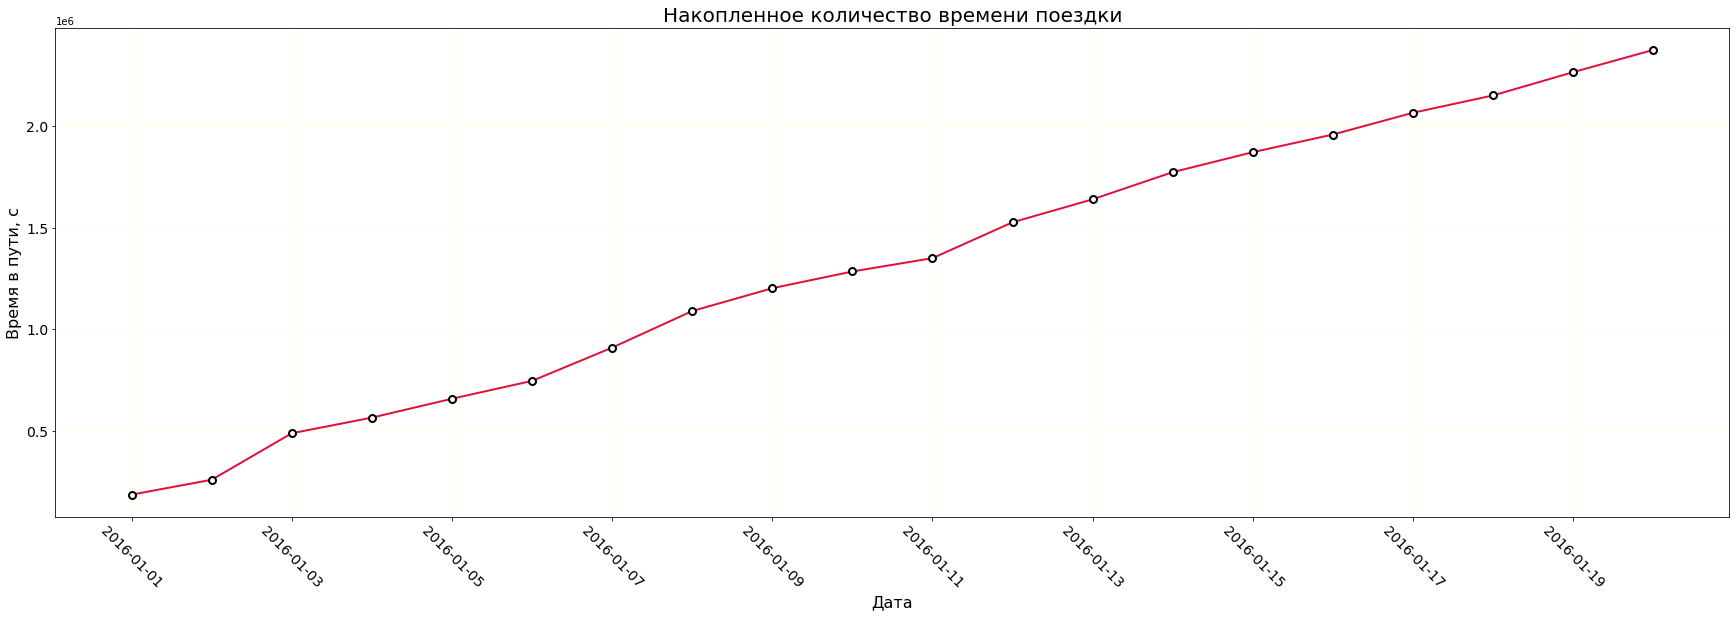

In [25]:
plt.figure(figsize=(30, 9))

plt.title('Накопленное количество времени поездки', fontsize=20)
plt.xlabel('Дата', fontsize=16, color='black')
plt.ylabel('Время в пути, c', fontsize=16)
plt.xticks(fontsize=14, rotation=315)
plt.yticks(fontsize=14)
plt.grid(color='ivory', linewidth=2)
plt.plot(data['date'][0:20], data['duration'][0:20].cumsum(), color='crimson',
    linewidth=2, marker='o', markersize=7, markerfacecolor='white',
    markeredgecolor='black', markeredgewidth=2)
plt.show()

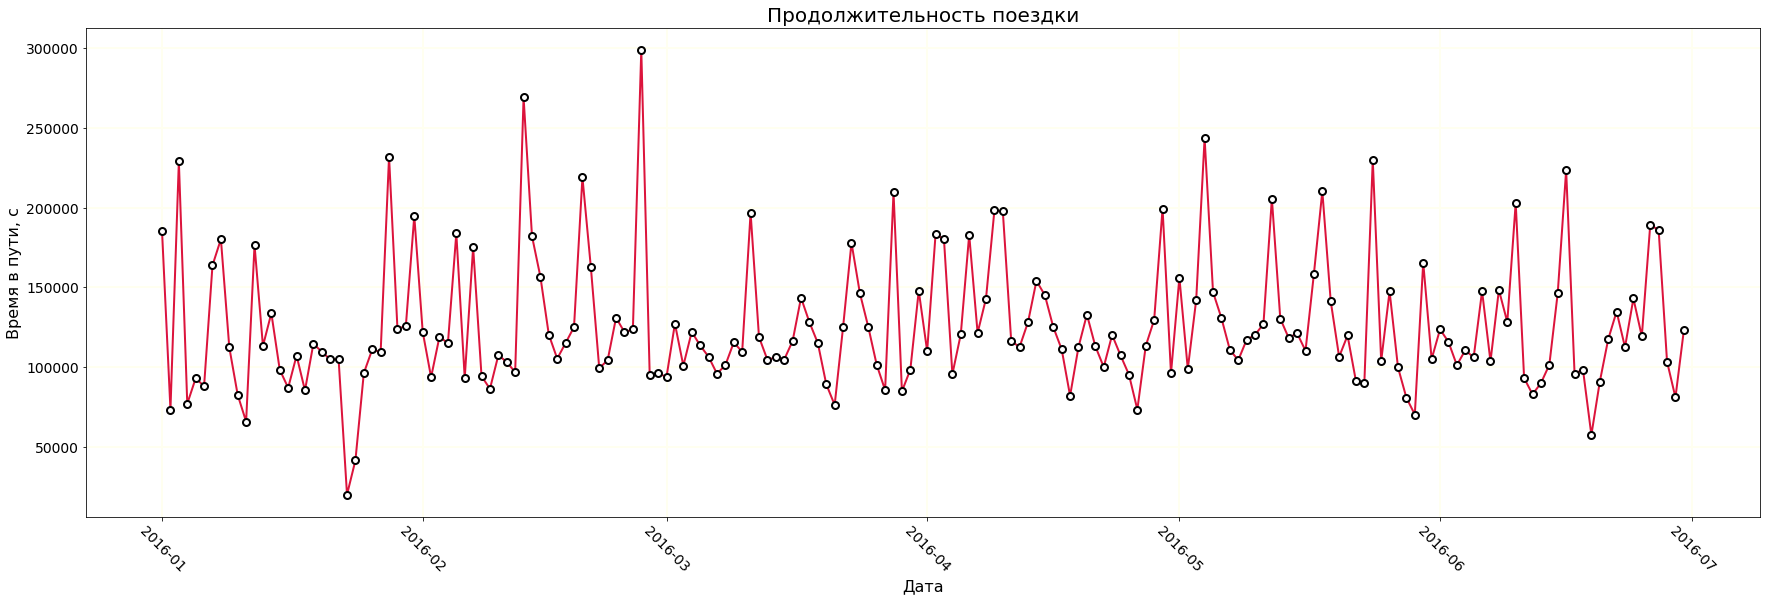

In [22]:
plt.figure(figsize=(30, 9))

plt.title('Продолжительность поездки', fontsize=20)
plt.xlabel('Дата', fontsize=16, color='black')
plt.ylabel('Время в пути, c', fontsize=16)
plt.xticks(fontsize=14, rotation=315)
plt.yticks(fontsize=14)
plt.grid(color='ivory', linewidth=2)
plt.plot(data['date'], data['duration'], color='crimson',
    linewidth=2, marker='o', markersize=7, markerfacecolor='white',
    markeredgecolor='black', markeredgewidth=2)
plt.show()

In [14]:
data['date'][0:20]

0     2016-01-01
1     2016-01-02
2     2016-01-03
3     2016-01-04
4     2016-01-05
5     2016-01-06
6     2016-01-07
7     2016-01-08
8     2016-01-09
9     2016-01-10
10    2016-01-11
11    2016-01-12
12    2016-01-13
13    2016-01-14
14    2016-01-15
15    2016-01-16
16    2016-01-17
17    2016-01-18
18    2016-01-19
19    2016-01-20
Name: date, dtype: object